In [1]:
# Parameters
# Refer to injected parameters for any run.ipynb (similar cell below)
strain = 'BY4741'
locus = 'FKS1-HS1'
pool_type = 'single'

# Notebook to select mutants to be reconstructed in the parental strain

In this section, we select single mutants of the specified hotspot to recreate in the parental strain. These mutants will be tested in a standard growth assay in isolated wells. The log2FC(AUC) compared to the WT will be compared with selection coefficients to validate the DMS. To make sure we can evaluate correlation with DMS scores properly, we need variants that span the full range of effects.

The entire notebook was meant to be run several times until we were satisfied with the selection of mutants to be reconstructed.

## Import libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['svg.fonttype'] = 'none'
from upsetplot import from_indicators
from upsetplot import UpSet

## Specify paths

In [3]:
classified_path = 'aggregated_data/classified_variants/'

## Import single mutants

In [4]:
BY11nnk = pd.read_csv(f'{classified_path}/{strain}_{locus}_{pool_type}/aa_refined_classification.csv', index_col=0)
BY11nnk = BY11nnk[(BY11nnk.Nham_aa <=1)
                  & (BY11nnk.cscore < 3)
                 ].reset_index(drop=True)
BY11nnk

,compound,seq_type,Nham_aa,aa_seq,s,cscore,refined_class,sensres
0,anidulafungin,ortho,1.0,FLILSLRDP,-0.223979,1.0,WT-like,sensitive
1,anidulafungin,ortho,1.0,FLTLSLRDP,0.127139,1.0,WT-like,sensitive
2,anidulafungin,single,0.0,FLVLSLRDP,-0.062763,1.0,WT-like,sensitive
3,anidulafungin,single,1.0,*LVLSLRDP,0.230635,1.0,WT-like,sensitive
4,anidulafungin,single,1.0,ALVLSLRDP,1.756300,1.0,intermediary,resistant
...,...,...,...,...,...,...,...,...
729,none,single,1.0,FLVLSLRDQ,0.007008,1.0,WT-like,sensitive
730,anidulafungin,single,1.0,FLWLSLRDP,1.445682,1.0,intermediary,resistant
731,caspofungin,single,1.0,FLWLSLRDP,1.040897,1.0,intermediary,resistant
732,micafungin,single,1.0,FLWLSLRDP,0.903476,1.0,intermediary,resistant


## Annotate MARDy mutants + handpicked mutants

Note: one mutant was missing from the DMS dataset (F639C) but was reconstructed individually so we now have an inferred score for it

In [5]:
if locus == 'FKS1-HS1':
    mardy_mut = ['CLVLSLRDP','VLVLSLRDP','SLVLSLRDP','FLVYSLRDP','FLVFSLRDP','FLVLPLRDP','FLVLFLRDP','FLVLYLRDP','FLVLCLRDP','FLVLSLRDA']
    print(f'{len([x for x in BY11nnk.aa_seq.unique() if x in mardy_mut])}/{len(mardy_mut)} mutants from MARDy 2.0 in this dataset + F639del')
    print(f'In MARDy 2.0 but not in the dataset: {[x for x in mardy_mut if x not in BY11nnk.aa_seq.unique()]}')
    missing_in_NNK = ['CLVLSLRDP', 'FDVLSLRDP', 'FLVGSLRDP', 'FLVLSLRDQ', 'FLVLSLRDN']
    # These mutants are entered manually based on their effect
    handpicked_mut = ['FKVLSLRDP', 'FLSLSLRDP', 'FGVLSLRDP', 'FLVLSLRWP', 'DLVLSLRDP', 'ELVLSLRDP', 'FLFLSLRDP', 'FLHLSLRDP', 'FLVKSLRDP', 'FLVLLLRDP', 'FLVLSLDDP', 'FLVLSLSDP', 'FLWLSLRDP', 'FLVLSLQDP', 'QLVLSLRDP']
    # We keep the unique variants from both sets
    select_mut = set(missing_in_NNK + handpicked_mut + mardy_mut)
    print(f'{len(select_mut)} single mutants attempted to be recreated in the parental strain')
    reconstructed_mut = [x for x in select_mut if x != 'FLVLSLRDA'] # the only single mutant we were not able to recreate
elif locus == 'FKS1-HS2':
    mardy_mut = ['DWVRHYTL', 'DWVRGYTL', 'DWVRSYTL']
    print(f'{len([x for x in BY11nnk.aa_seq.unique() if x in mardy_mut])}/{len(mardy_mut)} mutants from MARDy 2.0 in this dataset')
    print(f'In MARDy 2.0 but not in the dataset: {[x for x in mardy_mut if x not in BY11nnk.aa_seq.unique()]}')
    select_mut = ['DWVRRYTF','DWVRPYTL','RWVRRYTL','DWVRRYTK','VWVRRYTL','DWVRRETL','DWVNRYTL','DRVRRYTL','DWVRVYTL']
    print(f'{len(select_mut)} single mutants attempted to be recreated in the parental strain')
    reconstructed_mut = []
else:
    print('No data for the specified hotspot')

10/10 mutants from MARDy 2.0 in this dataset + F639del
In MARDy 2.0 but not in the dataset: []
29 single mutants attempted to be recreated in the parental strain


In [6]:
def attribute_selection(x, mardy_list, custom_list):
    if x in mardy_list:
        return 'mardy'
    elif x in custom_list:
        return 'handpicked'
    else:
        return 'not'

In [7]:
BY11nnk['selected'] = BY11nnk.aa_seq.apply(lambda x: attribute_selection(x, mardy_mut, select_mut))
BY11nnk['reconstructed'] = BY11nnk.aa_seq.apply(lambda x: True if x in reconstructed_mut else False)
BY11nnk

,compound,seq_type,Nham_aa,aa_seq,s,cscore,refined_class,sensres,selected,reconstructed
0,anidulafungin,ortho,1.0,FLILSLRDP,-0.223979,1.0,WT-like,sensitive,not,False
1,anidulafungin,ortho,1.0,FLTLSLRDP,0.127139,1.0,WT-like,sensitive,not,False
2,anidulafungin,single,0.0,FLVLSLRDP,-0.062763,1.0,WT-like,sensitive,not,False
3,anidulafungin,single,1.0,*LVLSLRDP,0.230635,1.0,WT-like,sensitive,not,False
4,anidulafungin,single,1.0,ALVLSLRDP,1.756300,1.0,intermediary,resistant,not,False
...,...,...,...,...,...,...,...,...,...,...
729,none,single,1.0,FLVLSLRDQ,0.007008,1.0,WT-like,sensitive,handpicked,True
730,anidulafungin,single,1.0,FLWLSLRDP,1.445682,1.0,intermediary,resistant,handpicked,True
731,caspofungin,single,1.0,FLWLSLRDP,1.040897,1.0,intermediary,resistant,handpicked,True
732,micafungin,single,1.0,FLWLSLRDP,0.903476,1.0,intermediary,resistant,handpicked,True


## Visualize on distribution of fitness effects

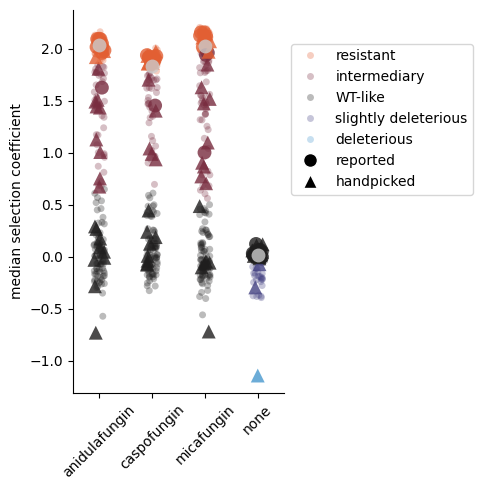

In [8]:
class_l = ['resistant','intermediary','WT-like','slightly deleterious','deleterious']

# Mutants not selected
fig = sns.catplot(BY11nnk[BY11nnk.selected == 'not'], x='compound', y='s', hue='refined_class',
                  hue_order=class_l, palette='icefire_r', alpha=.3)

# Mutants selected + reconstructed
sns.stripplot(BY11nnk[(BY11nnk.selected == 'mardy')
                      & (BY11nnk.reconstructed == True)
                     ], x='compound', y='s', hue='refined_class',
              hue_order=class_l, palette='icefire_r', marker='o', s=10, alpha=.8,
              legend=False)

sns.stripplot(BY11nnk[(BY11nnk.selected == 'handpicked')
                      & (BY11nnk.reconstructed == True)
                     ], x='compound', y='s', hue='refined_class',
              hue_order=class_l, palette='icefire_r', marker='^', s=10, alpha=.8,
              legend=False)

# Mutants selected but not reconstructed
sns.stripplot(BY11nnk[(BY11nnk.selected == 'mardy')
                      & (BY11nnk.reconstructed == False)
                     ], x='compound', y='s',
              color='.8', marker='o', s=10, alpha=.8, zorder=100,
              legend=False)

sns.stripplot(BY11nnk[(BY11nnk.selected == 'handpicked')
                      & (BY11nnk.reconstructed == False)
                     ], x='compound', y='s',
              color='.8', marker='^', s=10, alpha=.8, zorder=100,
              legend=False)

fig.set(xlabel='', ylabel='median selection coefficient')
fig.set_xticklabels(rotation=45)

from matplotlib.lines import Line2D

handles, labels = fig.axes[0][0].get_legend_handles_labels()
for l in [('reported','o'), ('handpicked','^')]:
    labels.append(l[0])
    handles.append(Line2D([0], [0], marker=l[1], color='w', markerfacecolor='k', markersize=10))
    
fig._legend.remove()
plt.legend(handles=handles, labels=labels,
           bbox_to_anchor=(1, 0.5), loc='lower left', title=None, frameon=True,
          )

fig.tight_layout()

## Visualize on UpSet plot

In [9]:
parse_dict = {'resistant': True, 'sensitive': False}

In [10]:
BYnnkCompWide = BY11nnk.pivot_table(index=['aa_seq','selected','reconstructed'],
                                    columns='compound',
                                    values=['s','sensres'],
                                    aggfunc='first'
                                   ).reset_index()
BYnnkCompWide['max_s'] = BYnnkCompWide['s'].max(axis=1)
bincat = BYnnkCompWide['sensres'].replace(parse_dict)
bincat.rename(columns={'anidulafungin':'AF',
                       'caspofungin':'CF',
                       'micafungin':'MF',
                       'none':'ctrl'
                      }, inplace=True)
compounds = bincat.columns.tolist()
bincat = pd.concat([bincat, BYnnkCompWide[['max_s', 'selected', 'reconstructed']].droplevel(1, axis=1)], axis=1)
bincat.sort_values(by='selected', ascending=False, inplace=True)
bincat

,AF,CF,MF,ctrl,max_s,selected,reconstructed
0,False,False,False,False,0.419917,not,False
119,True,True,True,False,2.082255,not,False
111,True,True,True,False,2.139111,not,False
112,True,True,True,False,1.820699,not,False
113,True,True,False,False,1.351538,not,False
...,...,...,...,...,...,...,...
39,False,False,False,False,0.001425,handpicked,True
83,False,False,True,False,2.109278,handpicked,True
53,True,True,True,False,1.978596,handpicked,True
124,True,True,True,False,2.151452,handpicked,True


In [11]:
bincat.ctrl.unique()

array([False])

Text(0, 0.5, 'maximum\nresistance score')

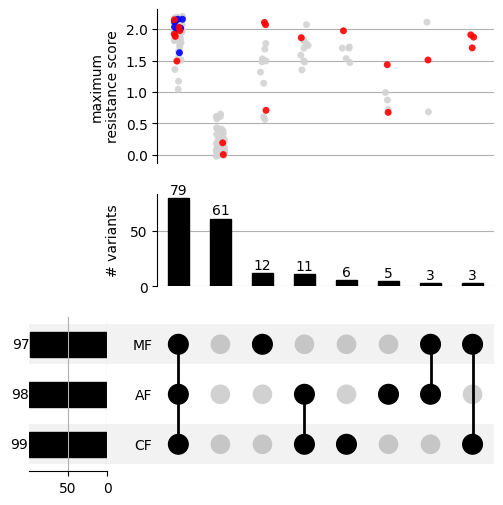

In [12]:
fig = plt.figure(figsize=(6, 6))

upset_obj = UpSet(from_indicators(compounds, data=bincat),
                   #show_percentages=True,
                   show_counts=True,
                   #min_subset_size=10,
                   sort_by='cardinality',
                   element_size=None,
                   intersection_plot_elements=2, # height of intersection barplot in matrix elements # needs to be 0 to be able to draw stacked_barplot
                   totals_plot_elements = 2, # width of totals barplot in matrix elements
                  )

upset_obj.add_catplot(value='max_s', kind='strip',
                      hue='selected', hue_order=['not','mardy','handpicked'], palette=['lightgrey','blue','red'], alpha=.9, s=5,
                      elements=3 # height in number of matrix elements
                      )

d = upset_obj.plot(fig=fig) # Assigns all plots to a dictionary containing axes subplots - same keys as gridspec returned by upset_obj.make_grid()
ax0 = d['intersections'] # Key corresponding to stacked barplot ('intersections' = intersection barplot)
ax1 = d['extra1'] # Key corresponding to additional plot, in this case catplot
ax1.get_legend().remove()

ax0.set_ylabel('# variants') # (unique aminoacid sequences)
ax1.set_ylabel('maximum\nresistance score')